In [77]:
import numpy as np 
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import np_utils 
from keras import backend as K 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 1. Trying different dataset sizes
Importing data from the .csv file

In [54]:
data = pd.read_csv("dict1.csv", header = None, names = ["Angles", "XY"])

In [178]:
data.head(10)

,Angles,XY
0,"-0.40510000000000002, -0.097100000000000006, -...",3.5048 0.9169 0.25
1,"-0.19320000000000001, 0.1341, -0.2646999999999...",3.6347 0.3976 0.25
2,"0.192, 0.155, -0.28570000000000001, -0.3931999...",3.1567 -1.6357 0.25
3,"0.24679999999999999, -0.18140000000000001, 0.1...",3.2989 -1.5492 0.25
4,"-0.35449999999999998, 0.3926, 0.1613, 0.078299...",3.6155 -0.2022 0.25
5,"0.31819999999999998, -0.22770000000000001, -0....",3.6511 -0.3356 0.25
6,"0.4531, 0.085400000000000004, 0.4546, 0.098799...",3.4324 0.4782 0.25
7,"0.1404, -0.065500000000000003, -0.084099999999...",3.6861 0.241 0.25
8,"0.34379999999999999, 0.27279999999999999, -0.4...",3.1972 -1.6062 0.25
9,"0.21460000000000001, -0.1293, -0.0403999999999...",3.6256 0.3925 0.25


Establishing labels and observations

In [55]:
train = data['Angles'].to_numpy()
labels = data['XY'].to_numpy()

Formatting of the data to the computer-readable format and dividing into training and testing sets

In [64]:
X = list()
Y = list()
for i in range(len(train)):
    labels[i] = labels[i].replace('   ', ' ')
    labels[i] = labels[i].replace('  ', ' ')
    labels[i] = labels[i].strip('[ ').strip(' ]')
    train[i] = train[i].strip('(').strip(')')
    result = [float(val) for val in train[i].split(',')]
    X.append(result)
    result = [float(val) for val in labels[i].split(' ')]
    Y.append(result)

Defining RMS error function

In [70]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss=rmse, optimizer=Adam(0.01))

Looping through experiments with a different size of a dataset

In [71]:
test_size_rmse = []
n = range(100, 5100, 100)
for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(np.asarray(X[0:i*100]), np.asarray(Y[0:i*100]), test_size=0.80)
    y_train = np.delete(y_train, 2, 1)
    y_test = np.delete(y_test, 2, 1)
    model.fit(X_train, y_train, epochs = 10, verbose = 0)
    scores = model.evaluate(X_test, y_test, verbose=0) 
    test_size_rmse.append(scores)

Plotting correlation data

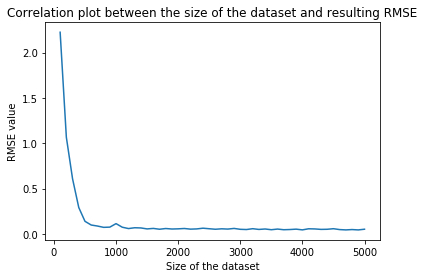

In [72]:
plt.plot(n,test_size_rmse)
plt.xlabel("Size of the dataset")
plt.ylabel("RMSE value")
plt.title("Correlation plot between the size of the dataset and resulting RMSE")
plt.show()

**Considering those results we take the whole datatset consisting of 5000 observations**

## 2. Trying different losses
a) MSLE - Mean Squared Logarithmic Error

In [87]:
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_logarithmic_error', optimizer=Adam(0.01))

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_msle = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_msle))

RMSE: 0.00349


b) MAE - Mean Absolute Error

In [88]:
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_absolute_error', optimizer=Adam(0.01))

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_mae = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_mae))

RMSE: 0.05830


c) MSE - Mean Squared Error

In [89]:
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=Adam(0.01))

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_mse = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_mse))

RMSE: 0.01906


d) Regular RMSE

In [120]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss=rmse, optimizer=Adam(0.01))

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores))

RMSE: 0.07049


Bar plot for comparison

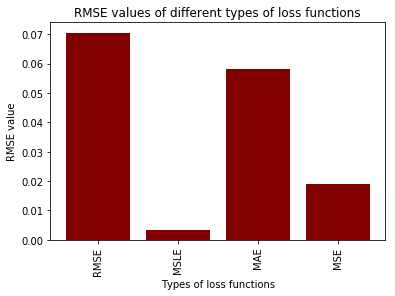

In [121]:
error_names = ['RMSE','MSLE','MAE','MSE']
errors = [scores, scores_msle, scores_mae, scores_mse]

plt.bar(range(len(error_names)), errors, color = 'maroon')
plt.xticks(range(len(error_names)), error_names, rotation='vertical')
plt.xlabel("Types of loss functions")
plt.ylabel("RMSE value")
plt.title("RMSE values of different types of loss functions")
plt.show()

**Considering the results of this testing we use MSLE in order to further improve out results**

## 3. Testing different number of layers
Loopint through the outcomes with the different number of layers

In [126]:
layers_scores = []

for i in range(1,30):
    model = Sequential()
    numb = 0
    model.add(Dense(10, input_dim =5, activation = 'relu'))
    numb += 1
    for r in range(1,i):
        model.add(Dense(16, activation = 'relu'))
        numb += 1
    model.add(Dense(2, activation='linear'))
    numb += 1
    model.compile(loss='mean_squared_logarithmic_error', optimizer=Adam(0.01))

    X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
    y_train = np.delete(y_train, 2, 1)
    y_test = np.delete(y_test, 2, 1)
    model.fit(X_train, y_train, epochs = 10, verbose = 0)
    score = model.evaluate(X_test, y_test, verbose=0) 
    print("Numer of layers: %d |   RMSE: %.5f" % (numb, score))
    layers_scores.append(score)

Numer of layers: 2 |   RMSE: 0.00310
Numer of layers: 3 |   RMSE: 0.00211
Numer of layers: 4 |   RMSE: 0.00085
Numer of layers: 5 |   RMSE: 0.00199
Numer of layers: 6 |   RMSE: 0.00067
Numer of layers: 7 |   RMSE: 0.00073
Numer of layers: 8 |   RMSE: 0.00087
Numer of layers: 9 |   RMSE: 0.12890
Numer of layers: 10 |   RMSE: 0.00170
Numer of layers: 11 |   RMSE: 0.00095
Numer of layers: 12 |   RMSE: 0.00062
Numer of layers: 13 |   RMSE: 1.20081
Numer of layers: 14 |   RMSE: 0.13224
Numer of layers: 15 |   RMSE: 0.00222
Numer of layers: 16 |   RMSE: 0.13028
Numer of layers: 17 |   RMSE: 1.07331
Numer of layers: 18 |   RMSE: 0.00237
Numer of layers: 19 |   RMSE: 1.20336
Numer of layers: 20 |   RMSE: 0.13197
Numer of layers: 21 |   RMSE: 0.00449
Numer of layers: 22 |   RMSE: 1.20201
Numer of layers: 23 |   RMSE: 1.20167
Numer of layers: 24 |   RMSE: 1.20249
Numer of layers: 25 |   RMSE: 0.13238
Numer of layers: 26 |   RMSE: 0.12754
Numer of layers: 27 |   RMSE: 0.13191
Numer of layers: 28 

Plotting the resulting correlation graph

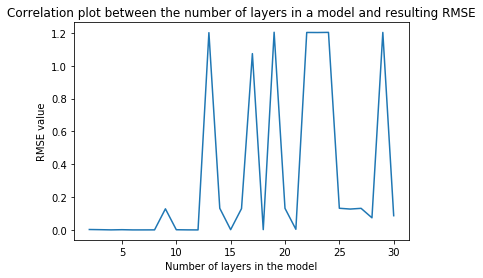

In [129]:
numb_arr = range(2,31)

plt.plot(numb_arr,layers_scores)
plt.xlabel("Number of layers in the model")
plt.ylabel("RMSE value")
plt.title("Correlation plot between the number of layers in a model and resulting RMSE")
plt.show()

**Therefore, the number of layers I'm going to use further is 4 layers**

## 5. Testing different optimizers
a) "Adam"

In [177]:
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_logarithmic_error', optimizer=Adam(0.01))

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_adam = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_adam))

RMSE: 0.00121


b) "SGD"

In [168]:
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_logarithmic_error', optimizer='sgd')

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_adam = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_adam))

RMSE: 0.07395


c) "Adagrad"

In [169]:
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_logarithmic_error', optimizer='Adagrad')

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_adam = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_adam))

RMSE: 0.01524


d) "Adadelta"

In [170]:
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_logarithmic_error', optimizer='Adadelta')

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_adam = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_adam))

RMSE: 0.01023


e) "RMSprop"

In [172]:
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_logarithmic_error', optimizer='RMSprop')

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_adam = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_adam))

RMSE: 0.13256


**The best optimizer so far belongs to "Adam" in this case**

# Final Performance:
### Old RMSE = 0.07 |     New RMSE = 0.001
### Used properties: 
Data-set of 5000 observations <br>
Loss function: MSLE - Mean Squared Logarithmic Error<br>
Number of layers: 6<br>
Numberof nodes in each layer: 70<br>